<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [36]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [37]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [38]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [39]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


 Median value of owner-occupied homes


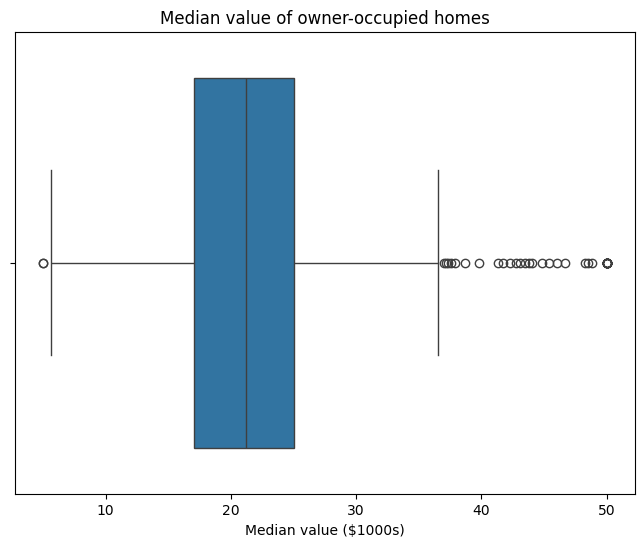

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import io
import aiohttp

# Task 2: Visualizations

# Boxplot for MEDV
print(" Median value of owner-occupied homes")
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Median value of owner-occupied homes')
plt.xlabel('Median value ($1000s)')
plt.show()



####  a boxplot for the median value of owner-occupied homes


a barplot for the Charles river variable


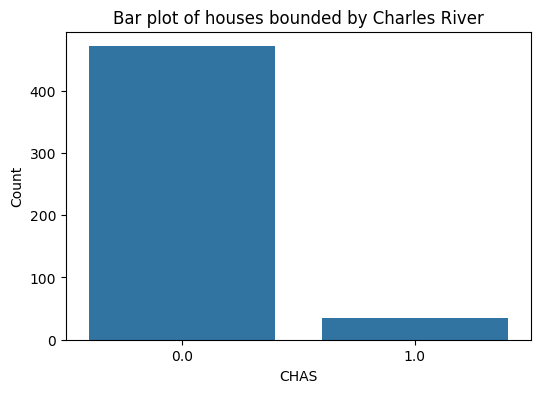

In [41]:


# Bar plot for CHAS
print("a barplot for the Charles river variable")
plt.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar plot of houses bounded by Charles River')
plt.xlabel('CHAS')
plt.ylabel('Count')
plt.show()



#### a barplot for the Charles river variable


Median value of owner-occupied homes vs Age of houses


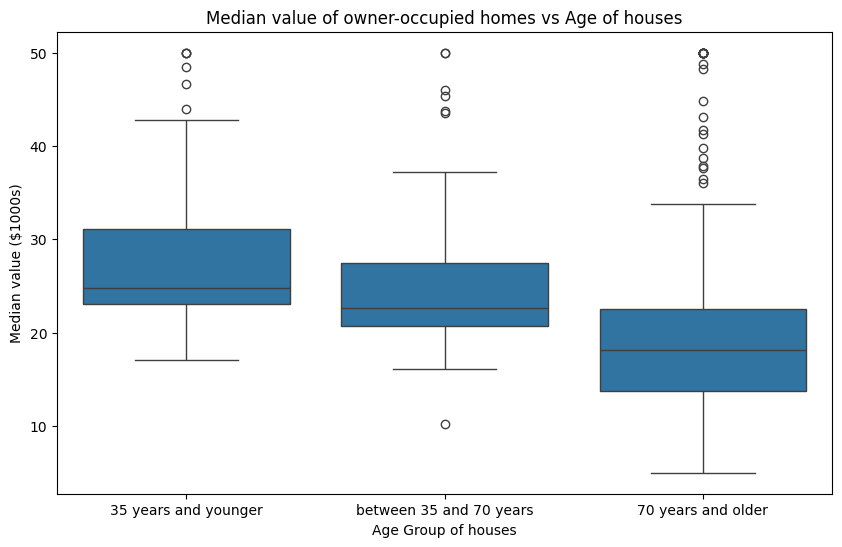

In [42]:

# Discretize AGE variable

boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, np.inf], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
print('Median value of owner-occupied homes vs Age of houses')
# Boxplot for MEDV vs AGE
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Median value of owner-occupied homes vs Age of houses')
plt.xlabel('Age Group of houses')
plt.ylabel('Median value ($1000s)')
plt.show()
 

#### Median value of owner-occupied homes vs Age of houses


Nitric oxide concentrations vs Non-retail business acres


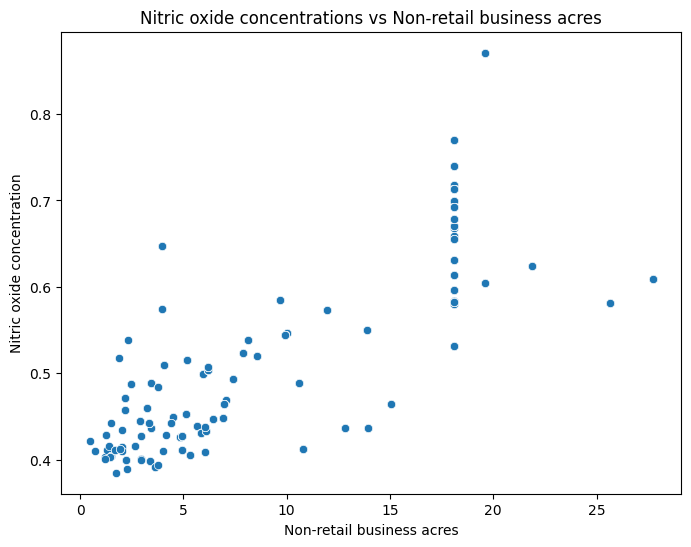

In [43]:

# Discretize AGE variable

boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, np.inf], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
print('Nitric oxide concentrations vs Non-retail business acres')
# Scatter plot for NOX vs INDUS
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Nitric oxide concentrations vs Non-retail business acres')
plt.xlabel('Non-retail business acres')
plt.ylabel('Nitric oxide concentration')
plt.show()



#### Nitric oxide concentrations vs Non-retail business acres


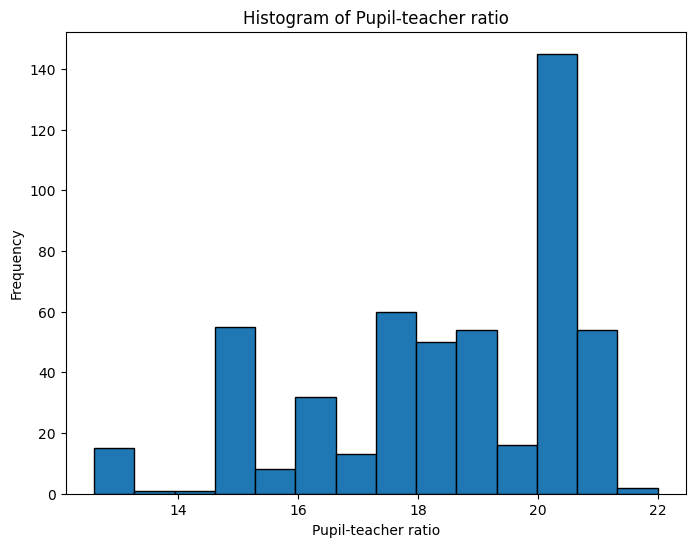

In [46]:

# Histogram for PTRATIO
print("Histogram of Pupil-teacher ratio")
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins='auto', edgecolor='black')
plt.title('Histogram of Pupil-teacher ratio')
plt.xlabel('Pupil-teacher ratio')
plt.ylabel('Frequency')
plt.show()


#### Histogram of Pupil-teacher ratio


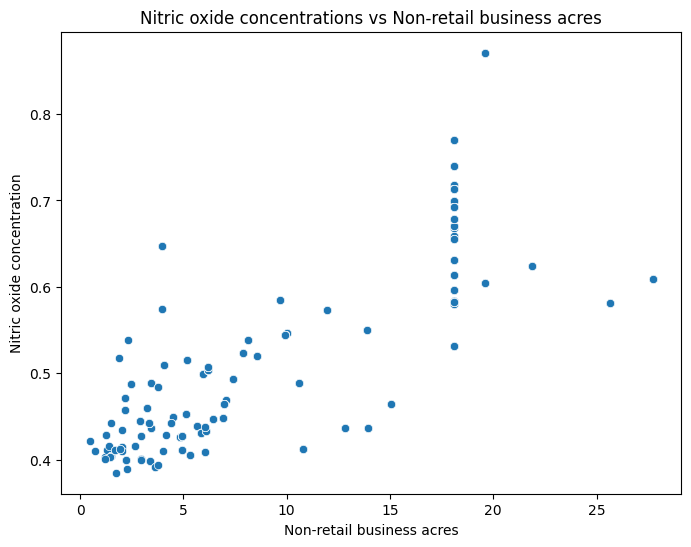

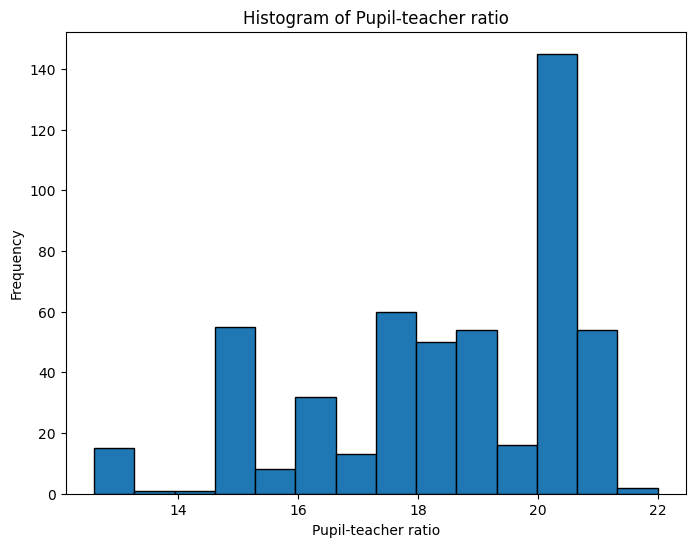

T-test for MEDV and CHAS: T-statistic = 3.996437466090509, p-value = 7.390623170519905e-05
Conclusion: Reject the null hypothesis. There is a significant difference in median house values based on Charles River proximity.
ANOVA for MEDV and AGE_Group: F-statistic = 36.40764999196599, p-value = 1.7105011022702984e-15
Conclusion: Reject the null hypothesis. There is a significant difference in median house values across different age groups.
Pearson correlation between NOX and INDUS: Correlation coefficient = 0.7636514469209192
Conclusion: There is a significant relationship between nitric oxide concentrations and non-retail business acres per town.
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 17

In [45]:

# Discretize AGE variable

boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, np.inf], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Task 3: Statistical Tests

# T-test for MEDV and CHAS
statistic, p_value = stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], boston_df[boston_df['CHAS'] == 0]['MEDV'])
print(f"T-test for MEDV and CHAS: T-statistic = {statistic}, p-value = {p_value}")
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in median house values based on Charles River proximity.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in median house values based on Charles River proximity.")

# ANOVA for MEDV and AGE_Group
anova_result = stats.f_oneway(boston_df[boston_df['AGE_Group'] == '35 years and younger']['MEDV'],
                              boston_df[(boston_df['AGE_Group'] == 'between 35 and 70 years')]['MEDV'],
                              boston_df[boston_df['AGE_Group'] == '70 years and older']['MEDV'])
print(f"ANOVA for MEDV and AGE_Group: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")
if anova_result.pvalue < alpha:
    print("Conclusion: Reject the null hypothesis. There is a significant difference in median house values across different age groups.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no significant difference in median house values across different age groups.")

# Pearson correlation between NOX and INDUS
corr, _ = stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print(f"Pearson correlation between NOX and INDUS: Correlation coefficient = {corr}")
if np.abs(corr) < 0.5:
    print("Conclusion: There is no significant relationship between nitric oxide concentrations and non-retail business acres per town.")
else:
    print("Conclusion: There is a significant relationship between nitric oxide concentrations and non-retail business acres per town.")

# Regression analysis for DIS vs MEDV
X = boston_df[['DIS']]
y = boston_df['MEDV']
X = sm.add_constant(X)  # adding a constant

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print(model.summary())


#### Add your code below following the instructions given in the course to complete the peer graded assignment
